<a href="https://colab.research.google.com/github/marwanhaqiqi/testing/blob/master/Tugas6-PM-1227050049-GallungMarwanHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mengimplementasikan Decision Tree pada dataset yang berbeda, yaitu dataset Wine dari scikit-learn.**

1. Memuat Dataset dan Library

In [ ]:
# Loading library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load wine dataset
wine = datasets.load_wine()

# Convert to dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

wine_df = sklearn_to_df(wine)
wine_df.rename(columns={'target':'wine_type'}, inplace=True)

# Show dataset description
print(wine_df.describe().T)
print("\nSample data:")
print(wine_df.head())

                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines

2. Eksplorasi Data

<ipython-input-2-7de8f8e7e2a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wine_type', data=wine_df, palette='Set2')


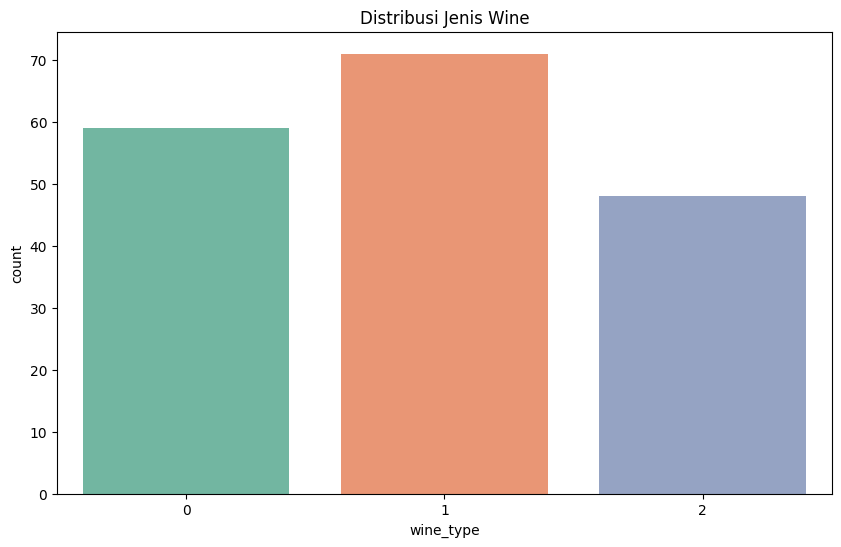

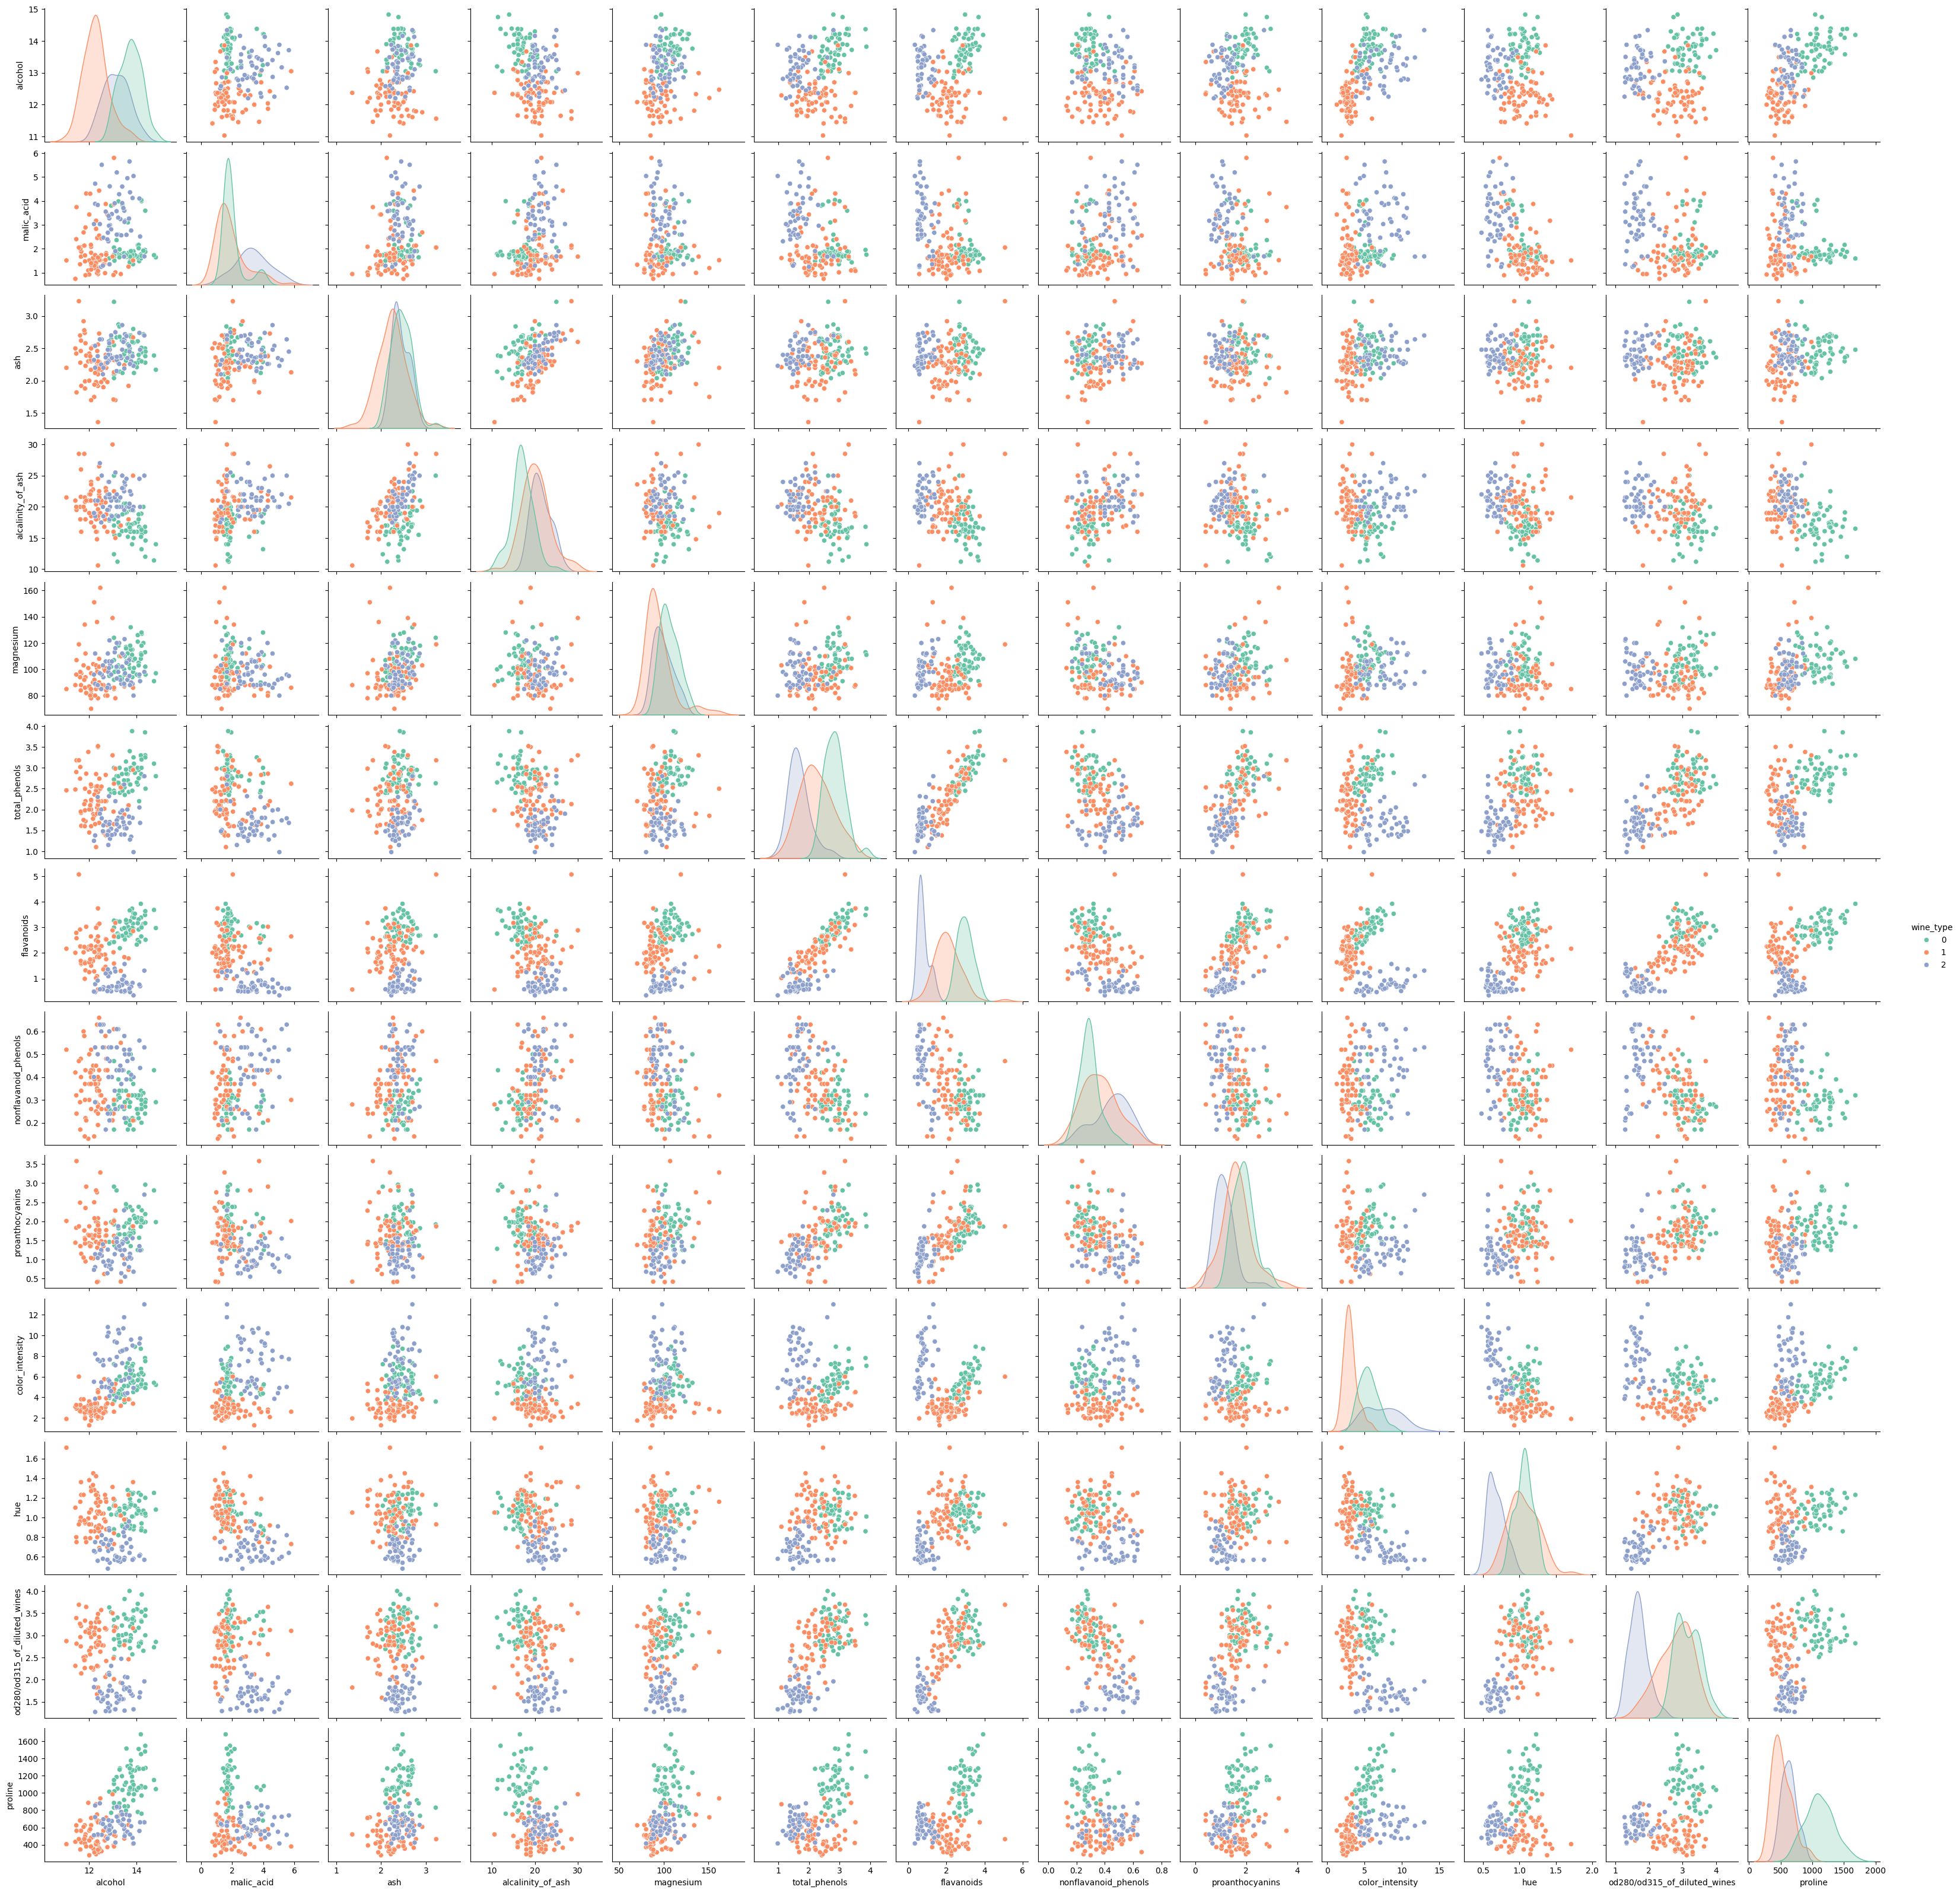

In [ ]:
# Visualisasi data
plt.figure(figsize=(10,6))
sns.countplot(x='wine_type', data=wine_df, palette='Set2')
plt.title('Distribusi Jenis Wine')
plt.show()

# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(wine_df, hue='wine_type', palette='Set2')
plt.show()

3. Membagi Data Training dan Testing

In [ ]:
# Split data into training and testing sets
X = wine_df.drop('wine_type', axis=1)
y = wine_df['wine_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 124
Jumlah data testing: 54


4. Membangun Model Decision Tree

In [ ]:
# Build decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

5. Evaluasi Model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



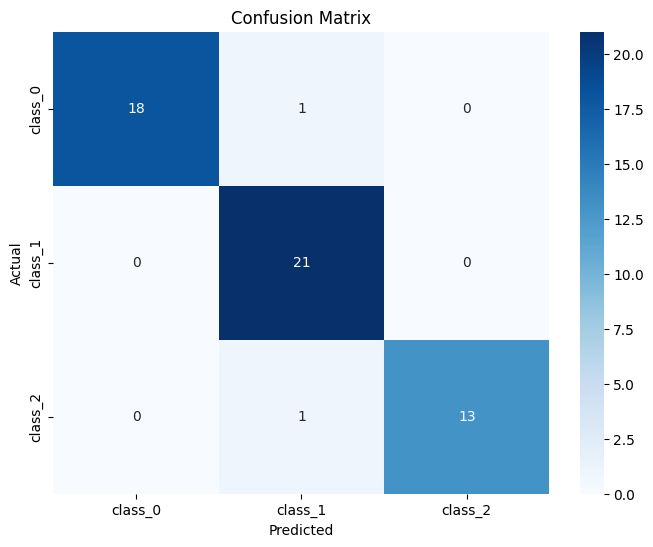

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

6. Visualisasi Decision Tree

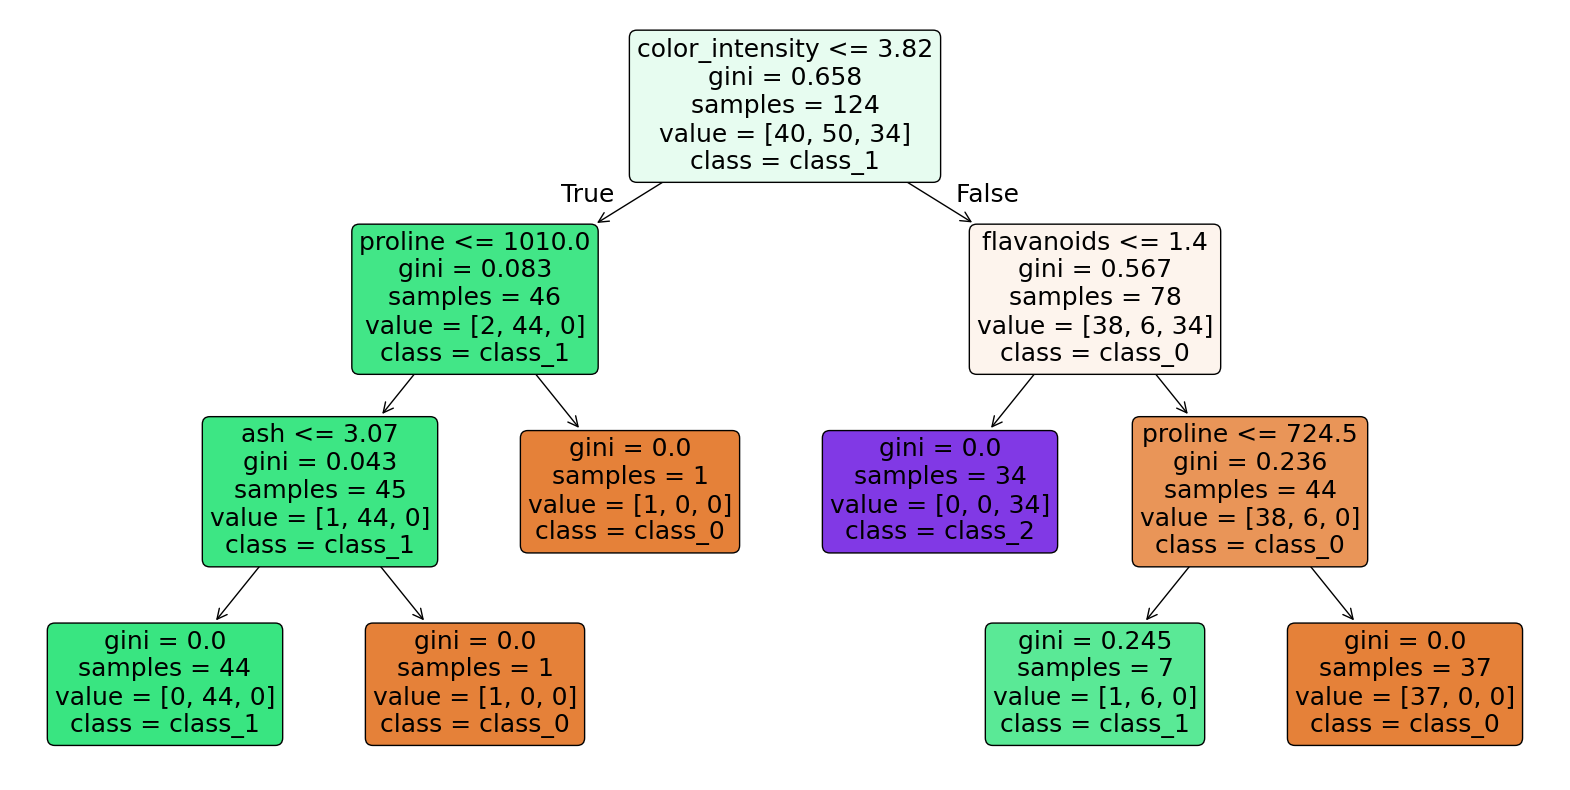

In [ ]:
# Visualize the decision tree
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=wine.feature_names,
               class_names=wine.target_names,
               filled=True,
               rounded=True)
plt.show()

7. Memprediksi Data Baru

In [ ]:
# Test with new data
wine_test_data = {
    'alcohol': 13.5,
    'malic_acid': 2.5,
    'ash': 2.2,
    'alcalinity_of_ash': 20.0,
    'magnesium': 100.0,
    'total_phenols': 2.8,
    'flavanoids': 2.7,
    'nonflavanoid_phenols': 0.3,
    'proanthocyanins': 1.9,
    'color_intensity': 5.0,
    'hue': 1.04,
    'od280/od315_of_diluted_wines': 3.5,
    'proline': 750.0
}

# Convert to dataframe and ensure correct feature order
test_df = pd.DataFrame([wine_test_data], columns=wine.feature_names)
prediction = model.predict(test_df)
print(f"\nPredicted wine type: {wine.target_names[prediction[0]]}")


Predicted wine type: class_0
